# Clustering

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [128]:
def load_courses(directory):
    files = [os.path.join(directory, file_name) for file_name in os.listdir(directory)]
    courses = {}

    for file_name in files:
        # Extracting the course name from the file name (excluding the ".csv" extension)
        course_name = os.path.splitext(os.path.basename(file_name))[0]
        if course_name == '.ipynb_checkpoints':
          continue

        # Reading the CSV file with the full path
        course_data = pd.read_csv(file_name)
        columns_to_drop = [col for col in course_data if 'min_score' in col  or 'max_score' in col or 'institution' in col]
        course_data = course_data.drop(columns_to_drop, axis=1)

        # Adding the course data to the dictionary
        courses[course_name] = course_data

    return courses

In [129]:
courses = load_courses('clustering_data') # Тук

In [144]:
def cluster(course_name, number_of_clusters = 3):
  courses = load_courses('clustering_data') # Tук пътя трябва да оправим
  df = courses[course_name]

  model = KMeans(n_clusters = number_of_clusters)
  clusters = model.fit_predict(df)

  n_components = 3
  pca = PCA(n_components=n_components)
  df_pca = pca.fit_transform(df)
  feature_importance = pd.DataFrame(abs(pca.components_), columns=df.columns)

  first_axis = [(df.columns[idx], pca.components_[0][idx]) for idx in np.argsort(pca.components_[0])[-3:]]
  second_axis = [(df.columns[idx], pca.components_[1][idx]) for idx in np.argsort(pca.components_[1])[-3:]]
  third_axis = [(df.columns[idx], pca.components_[2][idx]) for idx in np.argsort(pca.components_[2])[-3:]]

  all_axis = [first_axis, second_axis, third_axis]

  fig = px.scatter_3d(df_pca, x=0, y=1, z=2, color=clusters, opacity=0.7,
                    title='K-means Clustering with PCA 3D Visualization',
                    labels={'0': 'X', '1': 'Y', '2': 'Z'},
                    color_continuous_scale='viridis')
  fig.show()

  axis_importance = pd.DataFrame({'first': [first_axis[0][1], second_axis[0][1], third_axis[0][1]],
                                  'second': [first_axis[1][1], second_axis[1][1], third_axis[1][1]],
                                  'third': [first_axis[2][1], second_axis[2][1], third_axis[2][1]]})
  bar_width = 0.2
  bar_positions = range(3)

  plt.bar([pos + bar_width for pos in bar_positions], axis_importance['first'], width=bar_width)
  plt.bar(bar_positions, axis_importance['second'], width=bar_width)
  plt.bar([pos - bar_width for pos in bar_positions], axis_importance['third'], width=bar_width)
  for pos in bar_positions:
    plt.text(pos + bar_width, 0 + first_axis[pos][1]/10, all_axis[pos][0][0], ha='center', va='bottom', rotation=90)
    plt.text(pos, 0 + second_axis[pos][1]/10, all_axis[pos][1][0], ha='center', va='bottom', rotation=90)
    plt.text(pos - bar_width, 0 + third_axis[pos][1]/10, all_axis[pos][2][0], ha='center', va='bottom', rotation=90)

  plt.xticks(bar_positions, ['X', 'Y', 'Z'])
  plt.xlabel('Axis')
  plt.ylabel('Value')
  plt.title('Most Importnat Features')
  plt.legend()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[[('module_completed', 0.3131479334613151), ('quiz_avg_score', 0.33596498475091363), ('homework_avg_score', 0.384382509512897)], [('successful_homeworks', 0.22474817692740875), ('forum-topic_viewed', 0.25715163404636676), ('homework_avg_score', 0.29000290509586646)], [('resource_viewed', 0.25590707956264197), ('forum-topic_viewed', 0.2637999232231287), ('discussion_viewed', 0.2664409336850559)]]


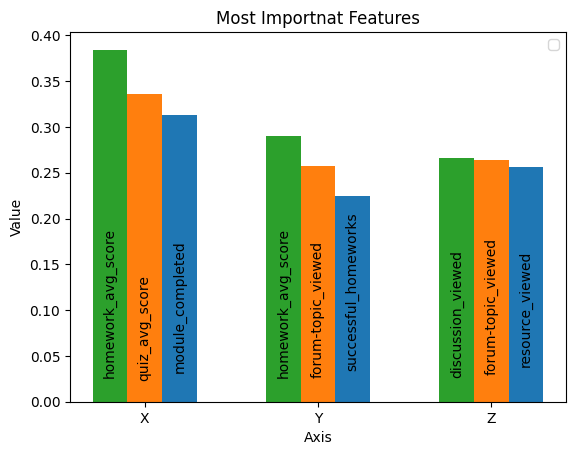

In [145]:
cluster('e-Learning')